### Aim:

In this notebook, naive bayes algorithm will be used to evaluate what additive effect (if any) ToxCast targets provide *for predicting mostDILI drugs* - when compared to existing predictors currently used in the field (eg: Chen M et al., 2016 Hepatol, Shah F et al., 2015 Toxicol Sci).

As before, same test/train data is used for this modeling to allow for comparison of model performance against alternative algorithms employed in separate notebooks.

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
plt.style.use('seaborn') 

%matplotlib inline

import pandas_profiling

In [20]:
#magic command to print all output instead of only last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Read-in datasets, prepare data for ML

All datasets have been previously treated for missing values and dummy coding of categorical variables(reactive_metabolites, classificn, and ~216 toxcast targets).
Output/target/Y variable for modeling purposes is "classificn" (1="mostDILI", 0 = "other" which includes lessDILI/ambiDILI/noDILI). <br>

In this notebook, same datasets previosuly used for logistic regression modeling will be imported. No EDA will be performed as the datasetts are identical to those previously used and EDA has already been done within the notebook using logistic regression as initial model.

Data once imported will be transformed into feature dataset ("X") and label dataset ("Y") and further split using stratified sampling with call to test train split function. For allowing to compare results from logistic regression, same random state will be used as before.

In [21]:
mc = pd.read_csv("mc_scaled_labeled.csv")
tc = pd.read_csv("tc_pca_labeled.csv")
mc_tc=pd.read_csv("mctc_pca_labeled.csv")

In [22]:
#Create "x" consisting of all independent variables from each of the dataframes (mc, tc, mc_tc) to be used for modeling

mc_num=mc.select_dtypes(include=[np.number])
x_mc=mc_num.drop(["classificn"], axis=1)

tc_num=tc.select_dtypes(include=[np.number])
x_tc=tc_num.drop(["classificn"], axis=1)

mc_tc_num=mc_tc.select_dtypes(include=[np.number])
x_mc_tc=mc_tc_num.drop(["classificn"], axis=1)

In [23]:
#create "y" consisting of outcome/target variable from each of the dataframes (mc, tc, mc_tc) to be used for modeling

y_mc=mc_num["classificn"] 
y_tc=tc_num["classificn"]
y_mc_tc=mc_tc_num["classificn"]

#check to make sure all datasets are equivalent for classification column
y_mc.equals(y_tc)
y_mc.equals(y_mc_tc)
y_tc.equals(y_mc_tc)

#breakdown of mostDILI drugs vs other drugs
y_mc.value_counts()#60 drugs are labeled as "mostDILI" and 115 drugs as "other"

True

True

True

0    115
1     60
Name: classificn, dtype: int64

In [24]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

## test train stratified split at 40:60 ratio (maintains ratio of mostDILI drugs:other drugs)
# allows for testing on 24 "mostDILI" and training on 36 "mostDILI" drugs
train_mcx, test_mcx, train_mcy, test_mcy = train_test_split(x_mc,y_mc, stratify=y_mc, test_size=0.4, random_state=45)

train_tcx, test_tcx, train_tcy, test_tcy = train_test_split(x_tc,y_tc, stratify=y_tc, test_size=0.4, random_state=45)

train_mctcx, test_mctcx, train_mctcy, test_mctcy = train_test_split(x_mc_tc,y_mc_tc, stratify=y_mc_tc, test_size=0.4, random_state=45)

#confirm that test datasets are same across all splits
test_mctcy.equals(test_tcy)
test_mcy.equals(test_tcy)

#train data distribution of 1's vs 0's
train_mcy.value_counts()

True

True

0    69
1    36
Name: classificn, dtype: int64

In [25]:
train_mcx.head()
x_mc.head()

,cmax,mol_wt,dailydose,logP,reactive_metabolites
66,-0.224248,1.708272,-0.541564,-0.728675,1.017292
55,-0.403543,-1.344926,-0.076238,-1.437584,1.017292
67,-0.403591,-0.340526,-0.628813,0.662220,1.017292
77,-0.403564,0.676282,-0.657431,-2.119571,-0.983002
121,-0.340790,-0.748993,-0.425233,-1.208759,1.017292


,cmax,mol_wt,dailydose,logP,reactive_metabolites
0,-0.246513,-0.411151,0.040093,-0.459470,1.017292
1,0.997393,-1.359063,2.832049,-0.791490,1.017292
2,-0.390792,-0.129961,-0.617180,1.873645,-0.983002
3,-0.394776,-0.558426,-0.192570,0.213544,1.017292
4,5.952769,-0.829645,0.796248,0.294306,1.017292


### Naive Bayes - initial model

In [26]:
# Instantiate and Fit
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB #note - I will only use GaussianNB as each of the features is assumed to be normally distributed (and scaled based on this)
# for a discussion on each of the NB options, check out this article: https://blog.sicara.com/naive-bayes-classifier-sklearn-python-example-tips-42d100429e44

nb_mc = GaussianNB() 
nb_tc = GaussianNB()
nb_mctc = GaussianNB()

#nb_mc?

#### Performance of models using 3-fold cross-validation

In [27]:
from sklearn.model_selection import cross_val_score

nb_accuracy_scores_mc = cross_val_score(nb_mc, x_mc, y_mc, cv=3, scoring='accuracy')
print("Accuracy: 3-fold cross validation scores with naive bayes using mc (Chen M et al., 2016 Hepatol) variables")
print(nb_accuracy_scores_mc)
print("Accuracy mean: " +str(nb_accuracy_scores_mc.mean()), "Accuracy standard deviation: " + str(nb_accuracy_scores_mc.std()))
print("")

nb_accuracy_scores_tc = cross_val_score(nb_tc, x_tc, y_tc, cv=3, scoring='accuracy')
print("Accuracy: 3-fold cross validation scores with naive bayes using tc (ToxCast targets/pathways) variables")
print(nb_accuracy_scores_tc)
print("Accuracy mean: " +str(nb_accuracy_scores_tc.mean()), "Accuracy standard deviation: " + str(nb_accuracy_scores_tc.std()))
print("")

nb_accuracy_scores_mctc = cross_val_score(nb_mctc, x_mc_tc, y_mc_tc, cv=3, scoring='accuracy')
print("Accuracy: 3-fold cross validation scores with naive bayes using combined mc and tc (Chen M et al, 2016 Hepatol and ToxCast) variables")
print(nb_accuracy_scores_mctc)
print("Accuracy mean: " +str(nb_accuracy_scores_mctc.mean()), "Accuracy standard deviation: " + str(nb_accuracy_scores_mctc.std()))

Accuracy: 3-fold cross validation scores with naive bayes using mc (Chen M et al., 2016 Hepatol) variables
[0.59322034 0.74137931 0.70689655]
Accuracy mean: 0.6804987336840055 Accuracy standard deviation: 0.06330036227755681

Accuracy: 3-fold cross validation scores with naive bayes using tc (ToxCast targets/pathways) variables
[0.57627119 0.68965517 0.62068966]
Accuracy mean: 0.6288720046756283 Accuracy standard deviation: 0.046649010002588906

Accuracy: 3-fold cross validation scores with naive bayes using combined mc and tc (Chen M et al, 2016 Hepatol and ToxCast) variables
[0.54237288 0.67241379 0.5862069 ]
Accuracy mean: 0.6003311903370349 Accuracy standard deviation: 0.05402025199393059


#### Fit NB models using test-train split

In [28]:
nb_mc = nb_mc.fit(train_mcx, train_mcy)
nb_tc = nb_tc.fit(train_tcx, train_tcy)
nb_mctc = nb_mctc.fit(train_mctcx, train_mctcy)

#### Predict using models fitted on test-train splits

In [29]:
### Using logistic regression model fitted using variables from Chen et al (mc), predict test values and probabilities  mc
nb_pred_mcy=nb_mc.predict(test_mcx) 
nb_probs_mcy=nb_mc.predict_proba(test_mcx) 

### Using logistic regression model fitted using variables from ToxCast (tc), predict test values and probabilities  mc
nb_pred_tcy=nb_tc.predict(test_tcx) 
nb_probs_tcy=nb_tc.predict_proba(test_tcx) 


### Using logistic regression model fitted using variables from Chen et al & ToxCast (mctc), predict test values and probabilities  mc
nb_pred_mctcy=nb_mctc.predict(test_mctcx) 
nb_probs_mctcy=nb_mctc.predict_proba(test_mctcx) 

#### Performance metrics of models fitted on test-train splits

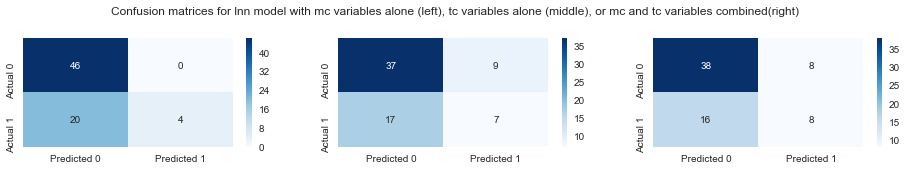

In [30]:
### Confusion Matrix
nb_cfm_mc=metrics.confusion_matrix(test_mcy, nb_pred_mcy)
nb_cfm_tc=metrics.confusion_matrix(test_tcy, nb_pred_tcy)
nb_cfm_mctc=metrics.confusion_matrix(test_mctcy, nb_pred_mctcy)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,2))

lbl1=["Predicted 0", "Predicted 1"]
lbl2=["Actual 0", "Actual 1"]

sns.heatmap(nb_cfm_mc, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2, ax=ax1)
sns.heatmap(nb_cfm_tc, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2, ax=ax2)
sns.heatmap(nb_cfm_mctc, annot=True, cmap="Blues", fmt="d", xticklabels=lbl1, yticklabels=lbl2, ax=ax3)


fig.suptitle("Confusion matrices for lnn model with mc variables alone (left), tc variables alone (middle), or mc and tc variables combined(right)", y=1.1);

In [31]:
### Precision, Recall
nb_cr_mc=metrics.classification_report(test_mcy, nb_pred_mcy)
nb_cr_tc=metrics.classification_report(test_tcy, nb_pred_tcy)
nb_cr_mctc=metrics.classification_report(test_mctcy, nb_pred_mctcy)
print("precision_recall for model with mc variables alone")
print(nb_cr_mc)
print("precision_recall for model with tc variables alone")
print(nb_cr_tc)
print("precision_recall for model with mc&tc variables combined")
print(nb_cr_mctc)

precision_recall for model with mc variables alone
             precision    recall  f1-score   support

          0       0.70      1.00      0.82        46
          1       1.00      0.17      0.29        24

avg / total       0.80      0.71      0.64        70

precision_recall for model with tc variables alone
             precision    recall  f1-score   support

          0       0.69      0.80      0.74        46
          1       0.44      0.29      0.35        24

avg / total       0.60      0.63      0.61        70

precision_recall for model with mc&tc variables combined
             precision    recall  f1-score   support

          0       0.70      0.83      0.76        46
          1       0.50      0.33      0.40        24

avg / total       0.63      0.66      0.64        70



In [32]:
#calculate values to populate ROC curve
from sklearn.metrics import roc_curve

nb_fpr_mc,nb_tpr_mc, nb_thresholds_mc=roc_curve(test_mcy, nb_probs_mcy[:, 1])
nb_roc_auc_mc=metrics.auc(nb_fpr_mc, nb_tpr_mc)

nb_fpr_tc,nb_tpr_tc, nb_thresholds_tc=roc_curve(test_tcy, nb_probs_tcy[:, 1])
nb_roc_auc_tc=metrics.auc(nb_fpr_tc, nb_tpr_tc)

nb_fpr_mctc,nb_tpr_mctc, nb_thresholds_mctc=roc_curve(test_mctcy, nb_probs_mctcy[:, 1])
nb_roc_auc_mctc=metrics.auc(nb_fpr_mctc, nb_tpr_mctc)

#Calculate values to populate precision-recall curve
from sklearn.metrics import precision_recall_curve

nb_precision_mc, nb_recall_mc, nb_thresholds_mc = precision_recall_curve(test_mcy, nb_probs_mcy[:, 1]) #retrieve probability of being 1(in second column of probs_y)
nb_pr_auc_mc = metrics.auc(nb_recall_mc, nb_precision_mc)

nb_precision_tc, nb_recall_tc, nb_thresholds_tc = precision_recall_curve(test_tcy, nb_probs_tcy[:, 1]) #retrieve probability of being 1(in second column of probs_y)
nb_pr_auc_tc = metrics.auc(nb_recall_tc, nb_precision_tc)

nb_precision_mctc, nb_recall_mctc, nb_thresholds_mctc = precision_recall_curve(test_mctcy, nb_probs_mctcy[:, 1]) #retrieve probability of being 1(in second column of probs_y)
nb_pr_auc_mctc = metrics.auc(nb_recall_mctc, nb_precision_mctc)


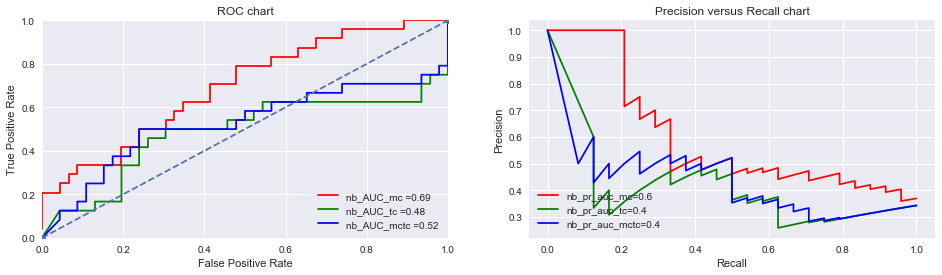

In [33]:
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(16)

axes = fig.add_subplot(121)

plt.title("ROC chart")
plt.plot(nb_fpr_mc, nb_tpr_mc, 'r', label='nb_AUC_mc =%0.2f'% nb_roc_auc_mc)
plt.plot(nb_fpr_tc, nb_tpr_tc, 'g', label='nb_AUC_tc =%0.2f'% nb_roc_auc_tc)
plt.plot(nb_fpr_mctc, nb_tpr_mctc, 'b', label='nb_AUC_mctc =%0.2f'% nb_roc_auc_mctc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'o--')
plt.axis([0,1, 0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")


axes = fig.add_subplot(122)
plt.title("Precision versus Recall chart")
plt.plot(nb_recall_mc, nb_precision_mc, "r", label = 'nb_pr_auc_mc=%.1f' % (nb_pr_auc_mc))
plt.plot(nb_recall_tc, nb_precision_tc, "g", label = 'nb_pr_auc_tc=%.1f' % (nb_pr_auc_tc))
plt.plot(nb_recall_mctc, nb_precision_mctc, "b", label = 'nb_pr_auc_mctc=%.1f' % (nb_pr_auc_mctc))
plt.legend(loc='lower left')
plt.ylabel("Precision")
plt.xlabel("Recall")

plt.show();

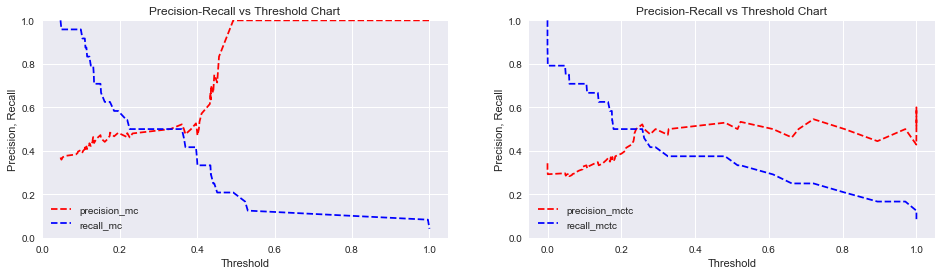

In [34]:
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(16)

axes = fig.add_subplot(121)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(nb_thresholds_mc, nb_precision_mc[: -1], "r--", label="precision_mc")
plt.plot(nb_thresholds_mc, nb_recall_mc[: -1], "b--", label="recall_mc")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])


axes = fig.add_subplot(122)
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(nb_thresholds_mctc, nb_precision_mctc[: -1], "r--", label="precision_mctc")
plt.plot(nb_thresholds_mctc, nb_recall_mctc[: -1], "b--", label="recall_mctc")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])


plt.show();

In [35]:
#### Adjust probability thresholds manually to increase sensitivity (based on precision-recall vs threshold chart)

In [36]:
#Adjust threshold to 0.3 (point where precision-recall cruves intersect in Precision-Recall vs Threshold chart above)
pred_y_thresh_mod1=(log.predict_proba(test_x) [:, 1]>=0.3).astype(bool)

#Adjust threshold to 0.2 
pred_y_thresh_mod2=(nb.predict_proba(test_mcxx) [:, 1]>=0.).astype(bool)

fpr,tpr, thresholds=roc_curve(test_y, pred_y)
roc_auc=metrics.auc(fpr, tpr)

fp,tp, thr=roc_curve(test_y, pred_y_thresh_mod1)
roc_auc_thresh_mod1=metrics.auc(fp, tp)

f, t, th=roc_curve(test_y, pred_y_thresh_mod2)
roc_auc_thresh_mod2=metrics.auc(f,t)

fig = plt.figure()
fig.set_figheight(3)
fig.set_figwidth(5)

plt.title("ROC chart\nlogistic regression w/ different thresholds")
plt.plot(fpr, tpr, 'b', label='(threshold@0.5) AUC=%0.2f'% roc_auc)
plt.plot(fp, tp, 'r', label ='(threshold@0.3) AUC=%0.2f'% roc_auc_thresh_mod1)
plt.plot(f, t, 'g', label ='(threshold@0.2) AUC=%0.2f'% roc_auc_thresh_mod2)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'o--')
plt.axis([0,1, 0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

plt.show();


NameError: name 'log' is not defined

**Conclusion:** Relative to logistic regression (see separate notebook for results from logistic regression), Naive Bayes performs worse y a/c metrics using either <br>
a) current predictors alone in FDA model (Chen M et al., 2016 Hepatol) or<br> 
b) ToxCast predictors alone or <br>
c) both sets of predictors combined<br>

Tweaking of Naive Bayes thresholds will not substantially increase precision/recall either.

Thus, Naive Bayes is not a useful option for modeling of mostDILI drugs - regardless of dataset/predictors used in this study.
